# Email Spam Classification Lab
In this Assigement, we:
1. Preprocess the data by encoding the text, cleaning if needed, and splitting into training and testing sets.
2. Train a Logistic Regression model on the preprocessed data and use it to make predictions.
3. Evaluate the model with a confusion matrix, which we visualize using seaborn.


## Import Libaries 

In [90]:
# Import libraries

import pandas as pd  # for data manipulation
import numpy as np   # for numerical operations

# Import functions for model training and evaluation
from sklearn.model_selection import train_test_split  # to split dataset into training and testing sets
from sklearn.preprocessing import StandardScaler, LabelEncoder  # to scale data and encode labels
from sklearn.linear_model import LogisticRegression  # for the logistic regression model
from sklearn.metrics import confusion_matrix  # to evaluate the model using a confusion matrix

# Import plotting libraries
import matplotlib.pyplot as plt  # for plotting
import seaborn as sns  # for creating matrix plot

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer  # to convert text data into numeric form
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report  # to evaluate the model

## Data Exploration

In [92]:
# data exploration

# Load the dataset
data = pd.read_csv(r'C:\Users\DELL\Downloads\archive\combined_data.csv')  # Load CSV file into a DataFrame
print("Dataset shape:", data.shape)  # Output the number of rows and columns
data.info()  # Shows column names, non-null counts, and data types for each column

Dataset shape: (83448, 2)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83448 entries, 0 to 83447
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   83448 non-null  int64 
 1   text    83448 non-null  object
dtypes: int64(1), object(1)
memory usage: 1.3+ MB


In [94]:
data.head() # Displays the first 5 rows of the DataFrame

,label,text
0,1,ounce feather bowl hummingbird opec moment ala...
1,1,wulvob get your medircations online qnb ikud v...
2,0,computer connection from cnn com wednesday es...
3,1,university degree obtain a prosperous future m...
4,0,thanks for all your answers guys i know i shou...


## Data Preprocessing

We will clean the dataset by encoding categorical variables if present and scaling numeric features. The data is then split into an 80/20 train-test split.


In [96]:
# data preprocessing

RANDOM_STATE = 42  # Ensures same train/test split every time you run the code

# Remove any rows with missing values from the dataset
data.dropna(inplace=True)

# Initialize a CountVectorizer to convert text into numerical features
vectorizer = CountVectorizer(stop_words='english')  # Removes common English stopwords

# Apply the vectorizer to the 'text' column to transform text into a bag-of-words matrix
X = vectorizer.fit_transform(data['text'])  # X is a sparse matrix of token counts

# Extract the target variable (label column)
y = data['label']

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=RANDOM_STATE)  # 80% train, 20% test

print("Training set shape:", X_train.shape)  # Output shape of training features
print("Test set shape:", X_test.shape)      # Output shape of test features

Training set shape: (66758, 310499)
Test set shape: (16690, 310499)


## Modeling with Logistic Regression

We now initialize and train a logistic regression model on the vectorized text data.


In [98]:
# Initialize the Logistic Regression model
model = LogisticRegression(max_iter=1000, random_state=RANDOM_STATE)  # max_iter increased to ensure convergence

# Train (fit) the model on the training data
model.fit(X_train, y_train)  # Learns the relationship between email text features and spam/ham labels

# Use the trained model to make predictions on the test set
y_pred = model.predict(X_test)  # Predicts whether each email in the test set is spam or ham

# Print confirmation message
print("Logistic Regression model trained and predictions generated.")

Logistic Regression model trained and predictions generated.


## Model Evaluation and Visualization

Confusion Matrix:
 [[7791  147]
 [  85 8667]]


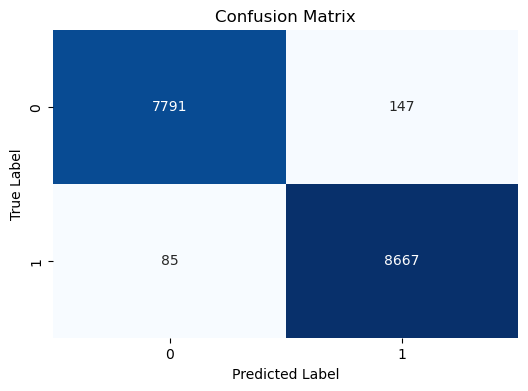

In [99]:
# model evaluation and visualization

# Create the confusion matrix to evaluate model performance
cm = confusion_matrix(y_test, y_pred)  # Compares actual vs. predicted labels

# Print the raw confusion matrix values
print("Confusion Matrix:\n", cm)  # Shows TP, FP, FN, TN counts

# Set up the plot size
plt.figure(figsize=(6, 4))  # Width: 6 inches, Height: 4 inches

# Plot the confusion matrix as a heatmap using seaborn
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)  # 'annot=True' shows the numbers inside the boxes

# Add title and axis labels to the plot
plt.title("Confusion Matrix")  # Title of the plot
plt.xlabel("Predicted Label")  # X-axis: model predictions
plt.ylabel("True Label")       # Y-axis: actual labels

plt.show()  # Displays the heatmap

### Performance Metrics

We'll check various metrics to understand how well our model is performing.

In [100]:
# performance metrics

# Print accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))  

# Print classification report
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))  
# Shows precision, recall, F1-score, and support for each class

Accuracy: 0.986099460754943

Classification Report:

              precision    recall  f1-score   support

           0       0.99      0.98      0.99      7938
           1       0.98      0.99      0.99      8752

    accuracy                           0.99     16690
   macro avg       0.99      0.99      0.99     16690
weighted avg       0.99      0.99      0.99     16690



## Summary Of The Code
In this code, we build and evaluate a Logistic Regression model to classify text data (such as emails) into two categories: spam and ham. 

1) Library Imports:

The code begins by importing necessary libraries for data manipulation (pandas, numpy), model training (Logistic Regression), and evaluation (confusion matrix, accuracy score).

It also imports libraries for text data preprocessing (CountVectorizer) and visualization (matplotlib, seaborn).

2) Data Exploration:

The dataset is loaded from a CSV file, and basic information about the data is displayed (such as the shape and column data types).

It also removes rows with missing values to ensure clean data for model training.

3) Text Preprocessing:

A CountVectorizer is initialized to convert text data into a numeric format (bag-of-words model). It also removes common English stopwords during the conversion.

The text data (in the 'text' column) is transformed into a sparse matrix, which is stored in X.

The target variable, y, is extracted from the 'label' column.

4) Train/Test Split:

The dataset is split into training and testing sets using an 80/20 ratio. This ensures that the model is trained on one portion of the data and tested on a separate unseen portion.

5) Model Training:

A Logistic Regression model is initialized with a max_iter parameter of 1000 to ensure the model converges.

The model is trained on the training data (X_train and y_train), learning the relationship between the text features and the target labels (spam/ham).

6) Model Evaluation:

The trained model is used to make predictions on the test data (X_test), and the predictions are compared to the actual labels.

A confusion matrix is created to evaluate the model's performance, showing the number of true positives (TP), false positives (FP), false negatives (FN), and true negatives (TN).

The confusion matrix is visualized as a heatmap for better understanding of model performance.

7) Performance Metrics:

The accuracy of the model is calculated and displayed, indicating the overall proportion of correct predictions.

# Regression Models
In this assignment, we 

build a machine learning pipeline to predict house prices based on various features of the houses. 
We begin by preprocessing the data, handling both categorical and numerical features, and scaling the numerical values to ensure optimal model performance. 
Next, we define and train a linear regression model using a preprocessing pipeline that simplifies the entire workflow. 
After splitting the data into training and testing sets, we evaluate the model’s performance using R² and Mean Squared Error (MSE). 
Finally, the trained model is used to make predictions on new data, showcasing its ability to generalize and predict house prices effectively.

## Import Libraries

In [104]:
import pandas as pd #for data manipulation and analysis
import numpy as np #for numerical operations
import matplotlib.pyplot as plt #for data visualization
import seaborn as sns #for advanced data visualization
from sklearn.model_selection import train_test_split #to split data into training and testing sets
from sklearn.linear_model import LinearRegression #Importing LinearRegression model from scikit-learn
from sklearn.preprocessing import StandardScaler #to scale features (standardize data)
from sklearn.metrics import mean_squared_error, r2_score #to evaluate the model (like MSE and R² score)

## Data Exploration

In [107]:
df = pd.read_csv(r'C:\Users\DELL\Downloads\kc_house_data.zip') # Reading the dataset from a CSV file
print("Initial Data Shape:", df.shape) # Printing the shape of the dataset (number of rows and columns)
print(df.isnull().sum()) # Checking for any missing (null) values

Initial Data Shape: (21613, 21)
id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64


In [109]:
df.dropna(inplace=True) # Dropping all rows with any missing (null) values 

In [111]:
# Check if the 'date' column exists in the DataFrame
if 'date' in df.columns:
    # Convert the 'date' column from string to datetime
    # The format '%Y%m%dT%H%M%S' matches how the date is written in the dataset
    df['date'] = pd.to_datetime(df['date'], format='%Y%m%dT%H%M%S')

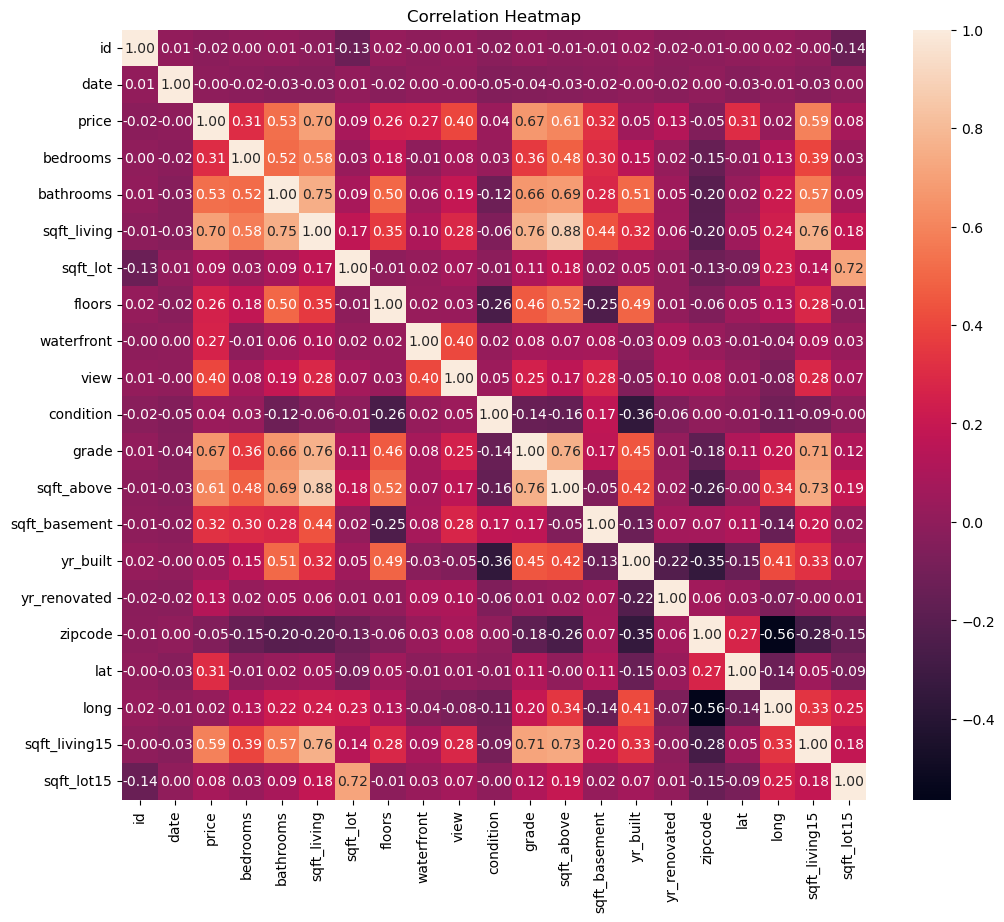

In [113]:
# Calculate the correlation matrix to see how each column relates to the others
correlation_matrix = df.corr() 
plt.figure(figsize=(12, 10)) # Set the size of the plot

# Create a heatmap using seaborn to visualize the correlations
# 'annot=True' shows the correlation values on the heatmap
# 'fmt=".2f"' formats the numbers to 2 decimal places
sns.heatmap(correlation_matrix, annot=True, fmt=".2f") 

plt.title('Correlation Heatmap') # Set the title of the heatmap
plt.show() # show the plot

In [ ]:
sns.pairplot(df[['price', 'sqft_living', 'bedrooms', 'bathrooms']]) # Create pairwise scatter plots for selected columns to see relationships between them
plt.show()

## Data Preprocessing

In [ ]:
features = ['sqft_living', 'bedrooms', 'bathrooms', 'floors', 'grade']
X = df[features] # Create the input X using the selected features
y = df['price'] # Set the target variable y (what we want to predict) as the house price

In [18]:
scaler = StandardScaler() # Initialize the StandardScaler to normalize the feature data
X_scaled = scaler.fit_transform(X) # Fit the scaler to X and transform it to have mean 0 and standard deviation 1
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
# Split the data into training and testing sets
# 80% for training, 20% for testing
# random_state ensures we get the same split every time we run the code

## Simple Linear Regression

In [20]:
X_simple = df[['sqft_living']] # Use only 'sqft_living' as the feature
X_train_s, X_test_s, y_train_s, y_test_s = train_test_split(X_simple, y, test_size=0.2, random_state=42)
# Split this single-feature data into training and testing sets

simple_model = LinearRegression() # Create a LinearRegression model
simple_model.fit(X_train_s, y_train_s) # Train the model using the training data
y_pred_s = simple_model.predict(X_test_s) # Predict house prices using the test set

print("Simple Linear Regression:")
print("R^2:", r2_score(y_test_s, y_pred_s)) # R-squared score shows how well the model explains the variability
print("MSE:", mean_squared_error(y_test_s, y_pred_s))  # Mean Squared Error shows average squared prediction error

Simple Linear Regression:
R^2: 0.49406905389089006
MSE: 76484977061.77612


## Visualization

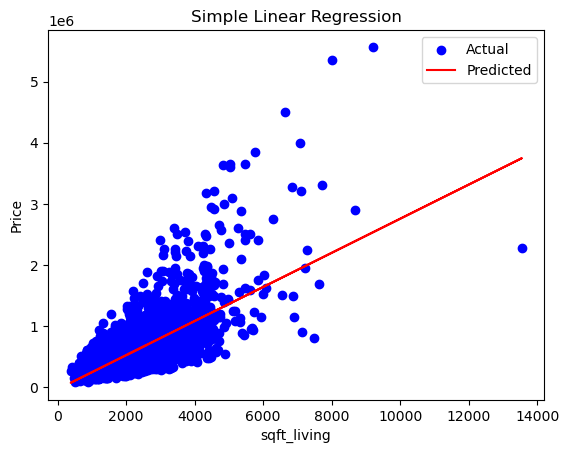

In [62]:
plt.scatter(X_test_s, y_test_s, color='blue', label='Actual') # Create a scatter plot for 'sqft_living' vs 'price'
plt.plot(X_test_s, y_pred_s, color='red', label='Predicted') # Plot the predicted values
plt.xlabel("sqft_living") # Label the x-axis as 'sqft_living'
plt.ylabel("Price") # Label the y-axis as 'Price'
plt.title("Simple Linear Regression") # Set the title of the plot
plt.legend() # Display the legend to differentiate actual vs predicted points
plt.show() # Show the plot

# Polynomial Regression

## Import Libraries

In [24]:
import pandas as pd # Importing pandas for data manipulation and analysis
import numpy as np # Importing numpy for numerical operations
import matplotlib.pyplot as plt # Importing matplotlib for data visualization
from sklearn.linear_model import LinearRegression # Importing LinearRegression model from scikit-learn
from sklearn.preprocessing import PolynomialFeatures, StandardScaler # Importing PolynomialFeatures to create polynomial features for higher degree regression
from sklearn.metrics import r2_score, mean_squared_error # Importing metrics to evaluate model performance (R² score and Mean Squared Error)
from sklearn.model_selection import train_test_split # Importing train_test_split to split the data into training and testing sets
from sklearn.pipeline import Pipeline # Importing Pipeline to streamline the process of building a machine learning model

## Data Exploration

In [26]:
data = pd.read_csv(r'C:\Users\DELL\Downloads\kc_house_data.zip') # Read the dataset from the CSV file
X = data[['sqft_living']].values # Select 'sqft_living' as the feature and convert it into a numpy array
y = data['price'].values # Select 'price' as the target variable and convert it into a numpy array

## Data Preprocessing

In [28]:
# Split the data into training and testing sets
# 80% for training, 20% for testing
# random_state ensures we get the same split each time we run the code
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

## Polynomial Degrees To Test

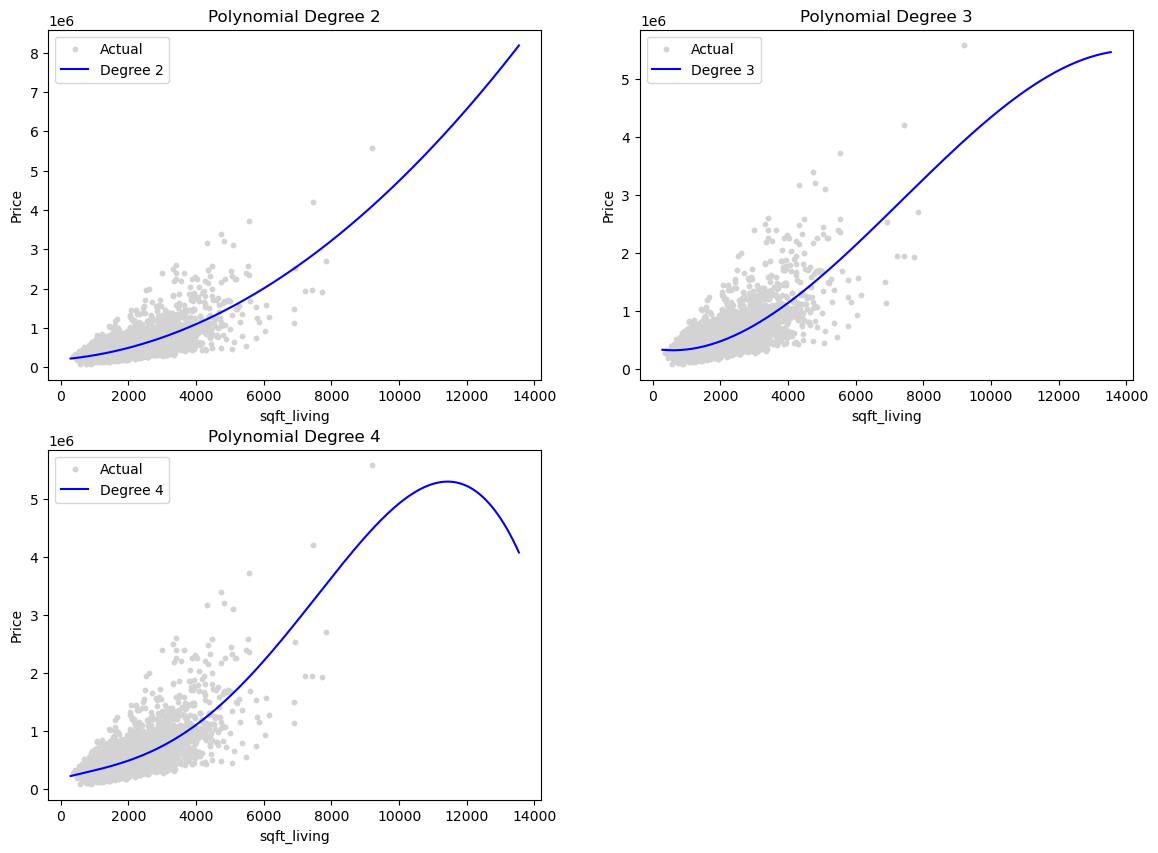

In [69]:
degrees = [2, 3, 4] # polynomial degrees to test
results = {} # store the results

plt.figure(figsize=(14, 10))

for i, degree in enumerate(degrees, start=1): # Loop through each polynomial degree to build and evaluate a model
    # Create pipeline
    model = Pipeline([
        ('poly', PolynomialFeatures(degree=degree)), # Add polynomial features
        ('scaler', StandardScaler()), # Standardize the data
        ('reg', LinearRegression()) # Apply linear regression
    ])

    # Fit and predict
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Calculate R-squared (R²) and Mean Squared Error (MSE)
    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    results[degree] = {'R2': r2, 'MSE': mse} # Store the evaluation metrics
    # Plot
    X_range = np.linspace(X.min(), X.max(), 300).reshape(-1, 1)
    y_range_pred = model.predict(X_range)

    plt.subplot(2, 2, i) # Create a subplot for each polynomial degree
    plt.scatter(X_test, y_test, color='lightgray', s=10, label='Actual')  # Scatter plot of actual data points (test data)
    plt.plot(X_range, y_range_pred, color='blue', label=f'Degree {degree}')
    # Set the title and labels for the plot
    plt.title(f'Polynomial Degree {degree}')
    plt.xlabel('sqft_living')
    plt.ylabel('Price')
    plt.legend() # Show the legend


In [32]:
plt.tight_layout() # Adjust the layout to ensure that the subplots fit within the figure without overlapping
plt.show()

<Figure size 640x480 with 0 Axes>

## Comparison Between Models Using Metrices

In [88]:
# Print comparison
print("MODEL COMPARISON (R² and MSE):\n") # Print the heading
print(f"{'Model':<30}{'R² Score':<15}{'MSE'}") # Print table column headers: Model Name, R² Score, and Mean Squared Error
print("-" * 60) # Print a line to separate headers 

# Print performance metrics for Simple Linear Regression:
# R² Score shows the target variable
# MSE shows the average squared error between predicted and actual values
print(f"{'Simple Linear Regression':<30}{r2_score(y_test_s, y_pred_s):.4f}{' ' * 8}{mean_squared_error(y_test_s, y_pred_s):.2f}")
print(f"{'Multiple Linear Regression':<30}{r2_multi:.4f}{' ' * 8}{mse_multi:.2f}") # Print performance metrics for Multiple Linear Regression

MODEL COMPARISON (R² and MSE):

Model                         R² Score       MSE
------------------------------------------------------------
Simple Linear Regression      0.4941        76484977061.78
Multiple Linear Regression    0.7509        29621273783.81


# Multiple Linear Regression

## Import Libraries

In [36]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder, StandardScaler # Importing OneHotEncoder to convert categorical features into numerical form
from sklearn.compose import ColumnTransformer # Importing ColumnTransformer to apply different transformations to different columns
from sklearn.pipeline import Pipeline # Importing Pipeline to streamline the process of building a machine learning model
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error # Importing metrics to evaluate model performance (R², Mean Absolute Error, and Mean Squared Error)

## Data Exploration

In [38]:
df.describe() # Generate a summary of the numerical columns in the DataFrame, showing count, mean, std, min, max, and quartiles

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,21613,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,...,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,2014-10-29 04:38:01.959931648,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,...,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
min,1.000102e+06,2014-05-02 00:00:00,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,...,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,2014-07-22 00:00:00,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,...,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,2014-10-16 00:00:00,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,...,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,2015-02-17 00:00:00,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,...,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,2015-05-27 00:00:00,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,...,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000
std,2.876566e+09,NaN,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,...,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631


In [40]:
correlation=df.corr() # Calculate the correlation matrix
correlation # Display the correlation matrix


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.000000,0.005577,-0.016762,0.001286,0.005160,-0.012258,-0.132109,0.018525,-0.002721,0.011592,...,0.008130,-0.010842,-0.005151,0.021380,-0.016907,-0.008224,-0.001891,0.020799,-0.002901,-0.138798
date,0.005577,1.000000,-0.004357,-0.016800,-0.034410,-0.034559,0.006313,-0.022491,0.001356,-0.001800,...,-0.039912,-0.027924,-0.019469,-0.000355,-0.024509,0.001404,-0.032856,-0.007020,-0.031515,0.002566
price,-0.016762,-0.004357,1.000000,0.308350,0.525138,0.702035,0.089661,0.256794,0.266369,0.397293,...,0.667434,0.605567,0.323816,0.054012,0.126434,-0.053203,0.307003,0.021626,0.585379,0.082447
bedrooms,0.001286,-0.016800,0.308350,1.000000,0.515884,0.576671,0.031703,0.175429,-0.006582,0.079532,...,0.356967,0.477600,0.303093,0.154178,0.018841,-0.152668,-0.008931,0.129473,0.391638,0.029244
bathrooms,0.005160,-0.034410,0.525138,0.515884,1.000000,0.754665,0.087740,0.500653,0.063744,0.187737,...,0.664983,0.685342,0.283770,0.506019,0.050739,-0.203866,0.024573,0.223042,0.568634,0.087175
sqft_living,-0.012258,-0.034559,0.702035,0.576671,0.754665,1.000000,0.172826,0.353949,0.103818,0.284611,...,0.762704,0.876597,0.435043,0.318049,0.055363,-0.199430,0.052529,0.240223,0.756420,0.183286
sqft_lot,-0.132109,0.006313,0.089661,0.031703,0.087740,0.172826,1.000000,-0.005201,0.021604,0.074710,...,0.113621,0.183512,0.015286,0.053080,0.007644,-0.129574,-0.085683,0.229521,0.144608,0.718557
floors,0.018525,-0.022491,0.256794,0.175429,0.500653,0.353949,-0.005201,1.000000,0.023698,0.029444,...,0.458183,0.523885,-0.245705,0.489319,0.006338,-0.059121,0.049614,0.125419,0.279885,-0.011269
waterfront,-0.002721,0.001356,0.266369,-0.006582,0.063744,0.103818,0.021604,0.023698,1.000000,0.401857,...,0.082775,0.072075,0.080588,-0.026161,0.092885,0.030285,-0.014274,-0.041910,0.086463,0.030703
view,0.011592,-0.001800,0.397293,0.079532,0.187737,0.284611,0.074710,0.029444,0.401857,1.000000,...,0.251321,0.167649,0.276947,-0.053440,0.103917,0.084827,0.006157,-0.078400,0.280439,0.072575


## Multiple Linear Regression

In [42]:
# MULTIPLE LINEAR REGRESSION
X_multi = df[['bedrooms', 'bathrooms', 'sqft_living', 'floors', 'zipcode']]

In [44]:
# Categorical & numerical split
categorical = ['zipcode']
numerical = ['bedrooms', 'bathrooms', 'sqft_living', 'floors']

In [46]:
# Preprocessing pipeline
preprocessor = ColumnTransformer([
    ('cat', OneHotEncoder(drop='first'), categorical), # 'cat' applies OneHotEncoder to categorical columns and drops the first category
    ('num', StandardScaler(), numerical) # 'num' applies StandardScaler to numerical columns
])

pipeline = Pipeline([
    ('preprocessing', preprocessor), # Preprocessing step
    ('regressor', LinearRegression()) # Linear Regression model
])

# Split the data into training and testing sets
X_train_m, X_test_m, y_train_m, y_test_m = train_test_split(X_multi, y, test_size=0.2, random_state=0)

pipeline.fit(X_train_m, y_train_m) # Fit the pipeline to the training data
y_pred_multi = pipeline.predict(X_test_m) # Predict house prices using the test set

## Model Evaluation

In [48]:
# Evaluation for multiple model
r2_multi = r2_score(y_test_m, y_pred_multi) # Calculate the R-squared (R²)
mse_multi = mean_squared_error(y_test_m, y_pred_multi) # Calculate the Mean Squared Error (MSE) 

In [50]:
# Example input data
new_data = pd.DataFrame([{
    'bedrooms': 3,
    'bathrooms': 1,
    'sqft_living': 1300,
    'floors': 1,
    'zipcode': 98103
}])

## Prediction Of New Data

In [52]:
# Predict using the trained pipeline
predicted_price = pipeline.predict(new_data)
print(f"Predicted price: {predicted_price[0]:.2f}")

Predicted price: 490841.73


## Comparison Between Simple And Multiple Linear Regression

In [54]:
print("MODEL COMPARISON (R² and MSE):\n")
print(f"{'Model':<30}{'R² Score':<15}{'MSE'}")
print("-" * 60)
print(f"{'Simple Linear Regression':<30}{r2_score(y_test_s, y_pred_s):.4f}{' ' * 8}{mean_squared_error(y_test_s, y_pred_s):.2f}")
print(f"{'Multiple Linear Regression':<30}{r2_multi:.4f}{' ' * 8}{mse_multi:.2f}")

MODEL COMPARISON (R² and MSE):

Model                         R² Score       MSE
------------------------------------------------------------
Simple Linear Regression      0.4941        76484977061.78
Multiple Linear Regression    0.7509        29621273783.81


## Summary Of The Code
This code demonstrates a complete workflow for building a machine learning model to predict house prices based on various features.

1) Data Preprocessing:

The data is split into categorical and numerical features.

A preprocessing pipeline is defined using ColumnTransformer, where:

Categorical features are one-hot encoded (with the first category dropped to avoid redundancy).

Numerical features are scaled using StandardScaler to normalize the data.

2) Model Pipeline:

A full pipeline is created with two main steps:

Preprocessing (encoding and scaling).

Linear Regression for predicting house prices.

The pipeline ensures that preprocessing and model training happen seamlessly.

3) Model Training and Evaluation:

The data is split into training and testing sets using train_test_split.

The pipeline is fit to the training data, and predictions are made on the test data.

The R² score and Mean Squared Error (MSE) are calculated to evaluate model performance.

4) Prediction on New Data:

The trained pipeline is used to predict house prices on new input data (new_data).

The predicted price is displayed in a readable format (rounded to two decimal places).